# Naive Bayes Algorithm

## Background reading:

*Intro to Statistical Learning*: Book Sections: 4.4.4 Naive Bayes

*Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (Page 26-31)

## Dataset:

The example on github uses the Cleveland Heart Disease data set from UCI
https://archive.ics.uci.edu/ml/datasets/Heart+Disease


**14 attributes used:**

1. (age)  
2. (sex)  (1 = male, 0 = female)
3. (cp) = presence of chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. (restbps) = resting blood pressure in mmHg
5. (chol) = cholesterol level in mg/dL
6. (fbs) = fasting blood sugar > 120 mg/dl (1 = yes , 0 = no)
7. (restecg)  = resting electrocardiographic level (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
8. (thalach)  = maximum heart rate achieved 
9. (exang)  = exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak)  = ST depression induced by exercise relative to rest 
11. (slope) = the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. (ca)  = number of major vessels colored by fluoroscopy  (0-3)
13. (thal)  = (3 = normal; 6 = fixed defect; 7 = reversible defect)
14. (num) = diagnosis of heart disease (this is the class that we want to predict; 0 = no heart disease, 1 = heart disease)

**Classes:**
0 = the patient has no presence of heart disease
1= the patient has heart disease


## Essence of Data
**What is Naive Bayes?**

Naive Bayes is a probabilistic algorithm that can be used for classification or clustering. The model predicts the instance’s class based on the instance's attributes using conditional probabilities.

Example: Spam filters in email applications use Naive Bayes to decide if an email is spam or not.

There are three types of Naive Bayes classification algorithms:
1. Gaussian Naive Bayes should be used for continuous values. It is assumed that the probability of these values follows a normal distribution.
2. Multinomial Naive Bayes should be used for discrete values.
3. Bernoulli Naive Bayes should be used if the value is a random variable that can only be one of two values (such as 0 and 1).

**How does Naive Bayes work?**

The algorithm predicts the class that the instance belongs to using Baye’s Theorem for conditional probabilities.

<div align = 'center'><font size = '24'>$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$</font></div>

Example: from the heart disease dataset

<div align = 'center'><font size = '4'>$P(heart\ disease|male)=\frac{P(male|heart\ disease)P(heart\ disease)}{P(male)}=\frac{\frac{114}{139}\times\frac{139}{303}}{\frac{206}{303}}=0.5534$</font></div>

**Two types of problems:**

**Classification**- The input instances (from the training data) are classified based on their class labels (whatever parameter we are trying to predict).  It is used for supervised learning because training data is required. Naive Bayes is typically used for classification.
The heart disease tutorial uses classification methods.

**Clustering-** There are no class labels and the instances are grouped together based on their similarities. Clustering is used for unsupervised learning.

**What assumptions are made?**

It is called “Naive” because it is assumed that all attributes are independent of each other.

**What are the issues that these assumptions can cause?**

All of the attributes are not necessarily independent of each other.
For example in the Cleveland Heart Disease dataset exercise induced angina can be correlated to the presence of stationary angina. Also, resting blood pressure and cholesterol levels are correlated. Bayesian Network (Bayes net) is a probabilistic graphical model that extends on capabilities of Naive Bayes by modeling specific dependencies between the attributes. In the most general form this is represented by a directed graph where each edge represents a conditional probability distribution between two attribute nodes. 

Related Articles:
Harvard Business Review: 10 Promising AI Applications in Health Care:

https://hbr.org/2018/05/10-promising-ai-applications-in-health-care?ab=at_art_art_1x4_s01 

**Related Concepts- Bayes decision boundary, test error
Bayes Decision Boundary**

![](./fig/Naive/fig1.png)

The purple dashed line represents the Bayes decision boundary. The decision boundary represents the points where the probability is exactly 50% of belonging to either class.
The orange grid indicates the region in which a test observation will be assigned to the orange class, and the blue grid indicates the region in which a test observation will be assigned to the blue class.


data bias is reflected as algorithmic error


# Example Codes

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

In [2]:
#load file as a dataframe
#df = pd.read_csv('processed.cleveland.csv')
df = pd.read_csv('processed.cleveland.csv')
#df
df

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
#check descriptive statistics of dataset
df.describe()

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.679868,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934878,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [4]:
#checking for null values
df.isna().sum()

age             0
sex             0
chestpain       0
restbps         0
cholesterol     0
fastingbs       0
restecg         0
thalach         0
exerciseang     0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

In [5]:
#separate target attribute
target = df.heartdisease
predictors = df.drop('heartdisease', axis = 'columns')

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

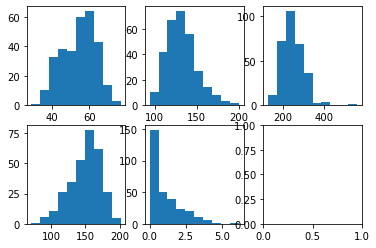

In [6]:
# Plot a histogram of each of the continous predictors. We will proceed with the assumption that each predictor follows a Gaussian distribution
# Some of the predictors are less likely to be Gaussian (oldpeak for example), so we should proceed with cautiona and keep in mind the assumptions we made when we go to interpret our results.
fig, ((p1, p2, p3), (p4, p5, p6)) = plt.subplots(nrows=2, ncols = 3)

p1.hist(predictors['age'])
p2.hist(predictors['restbps'])
p3.hist(predictors['cholesterol'])
p4.hist(predictors['thalach'])
p5.hist(predictors['oldpeak'])


In [7]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3, random_state = 18)

In [8]:
#number of instances in train set

len(x_train)

212

In [9]:
#number of instances in test set

len(x_test)

91

In [10]:
#train the model using the Gaussian model probabilities
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [11]:
#first 10 instances from the test set
x_test[:10]

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal
199,59,1,1,160,273,0,2,125,0,0.0,1,0,3
192,43,1,4,132,247,1,2,143,1,0.1,2,2,7
246,58,1,4,100,234,0,0,156,0,0.1,1,1,7
257,76,0,3,140,197,0,1,116,0,1.1,2,0,3
268,40,1,4,152,223,0,0,181,0,0.0,1,0,7
140,59,1,2,140,221,0,0,164,1,0.0,1,0,3
302,38,1,3,138,175,0,0,173,0,0.0,1,1,3
18,48,0,3,130,275,0,0,139,0,0.2,1,0,3
41,40,1,1,140,199,0,0,178,1,1.4,1,0,7
103,71,0,3,110,265,1,2,130,0,0.0,1,1,3


In [12]:
# actual instances of heart disease for the first 10 instances from the test set
y_test[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [13]:
#models prediction of heart disease for the first 10 instances from the test set
model.predict(x_test[:10])
y_pred=model.predict(x_test)

In [14]:
# score the accuracy of the model's predictions
accuracy = model.score(x_test,y_test)*100

In [15]:
#print the accuracy
print('the accuracy of the model is {0}%'.format(accuracy))

the accuracy of the model is 75.82417582417582%


In [16]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[38, 11],
       [11, 31]], dtype=int64)

Text(0.5, 257.44, 'Predicted Class')

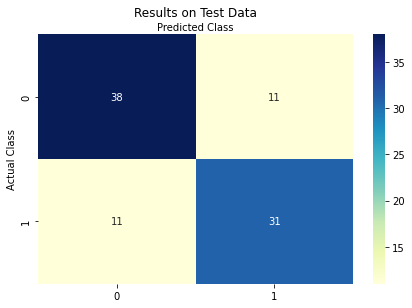

In [17]:
#heat map of accuracy - the model makes about the same number of type 1 as type 2 errors
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [18]:
#Rerun the analysis only using continuous predictors for Gaussian Naive Bayes
#drop non-continuous predictors
predictors_cont = predictors.drop(['sex', 'chestpain', 'fastingbs', 'restecg', 'exerciseang', 'slope', 'ca', 'thal'], axis = 'columns')

In [19]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train_cont, x_test_cont, y_train_cont, y_test_cont =  train_test_split(predictors_cont,target,test_size = 0.3, random_state = 18)

In [20]:
#train the model using the Gaussian model probabilities
model_cont = GaussianNB()
model_cont.fit(x_train_cont,y_train_cont)

GaussianNB()

In [21]:
#first 10 instances from the test set
x_test_cont[:10]

,age,restbps,cholesterol,thalach,oldpeak
199,59,160,273,125,0.0
192,43,132,247,143,0.1
246,58,100,234,156,0.1
257,76,140,197,116,1.1
268,40,152,223,181,0.0
140,59,140,221,164,0.0
302,38,138,175,173,0.0
18,48,130,275,139,0.2
41,40,140,199,178,1.4
103,71,110,265,130,0.0


In [22]:
# actual instances of heart disease for the first 10 instances from the test set
y_test_cont[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [23]:
#models prediction of heart disease for the first 10 instances from the test set
model_cont.predict(x_test_cont[:10])
y_pred=model_cont.predict(x_test_cont)

In [24]:
# score the accuracy of the model's predictions
accuracy_cont = model_cont.score(x_test_cont,y_test_cont)*100

In [25]:
#print the accuracy
print('the accuracy of the model with only the five continuous predictors is {0}%'.format(accuracy_cont))

the accuracy of the model with only the five continuous predictors is 63.73626373626373%


In [26]:
#Rerun the analysis only using continuous predictors for Multinomial Naive Bayes
#drop non-discrete predictors
predictors_disc = predictors.drop(['age', 'restbps', 'cholesterol', 'thalach', 'oldpeak'], axis = 'columns')


In [27]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train_disc, x_test_disc, y_train_disc, y_test_disc =  train_test_split(predictors_disc,target,test_size = 0.3, random_state = 18)

In [28]:
# actual instances of heart disease for the first 10 instances from the test set
y_test_disc[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [29]:
#train the model using the Multinomial model probabilities
model_disc = BernoulliNB()
model_disc.fit(x_train_disc, y_train_disc)

BernoulliNB()

In [30]:
#first 10 instances from the test set
x_test_disc[:10]

,sex,chestpain,fastingbs,restecg,exerciseang,slope,ca,thal
199,1,1,0,2,0,1,0,3
192,1,4,1,2,1,2,2,7
246,1,4,0,0,0,1,1,7
257,0,3,0,1,0,2,0,3
268,1,4,0,0,0,1,0,7
140,1,2,0,0,1,1,0,3
302,1,3,0,0,0,1,1,3
18,0,3,0,0,0,1,0,3
41,1,1,0,0,1,1,0,7
103,0,3,1,2,0,1,1,3


In [31]:
#models prediction of heart disease for the first 10 instances from the test set
model_disc.predict(x_test_disc[:10])
y_pred=model_disc.predict(x_test_disc)

In [32]:
# score the accuracy of the model's predictions
accuracy_disc = model_disc.score(x_test_disc, y_test_disc)*100

In [33]:
#print the accuracy
print('the accuracy of the model with only the five continuous predictors is {0}%'.format(accuracy_disc))

the accuracy of the model with only the five continuous predictors is 69.23076923076923%


In [34]:
#calculate the probability for each class for continuous model and discrete model
prob_cont = model_disc.predict_proba(x_test_disc)
prob_disc = model_cont.predict_proba(x_test_cont)

#multiply probabilities to find classification for combined model
prob_total = prob_cont * prob_disc

In [35]:
#determine if the model will classify each test value as 0 or 1 (by figuring out if p(0) < p(1))
classification = list()
for i in range(len(prob_total)):
    classification.append(int(prob_total[i][0] < prob_total[i][1]))

#convert y_test to a list and make 1 dataframe with predicted and actual data
y_list = y_test.tolist()
df2 = pd.DataFrame(list(zip(classification, y_list)), columns = ['Predicted', 'Actual'])
print(df2)

    Predicted  Actual
0           1       1
1           1       1
2           0       1
3           0       0
4           0       1
..        ...     ...
86          1       0
87          0       0
88          0       1
89          0       0
90          1       1

[91 rows x 2 columns]


In [36]:
#create a confusion matrix for the mixed model
confusion_matrix = pd.crosstab(df2['Actual'], df2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          38  11
1          13  29


Text(0.5, 257.44, 'Predicted Class')

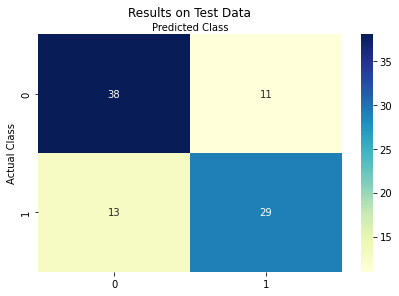

In [37]:
#heat map of accuracy - the model makes about the same number of type 1 as type 2 errors, it is also similar to the previous model
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

## AI in the fabrics of society
### The privacy problem and k-anonymity
How do we fix the problem of de-anonymization is important for hospital database system to protect privacy. Sometimes the unique records in the database can easily find the personnel information even his or her personnel information such as name or address are not shown in the database. One example in this database:

In [38]:
np.unique(df.age)

array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77], dtype=int64)

In [39]:
unique_record = df.loc[df.age ==29]
unique_record

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
132,29,1,2,130,204,0,2,202,0,0.0,1,0,3,0


As you can see above, even though the detail personnel information is not shown, we can find a unique record who is 29 years old and is a male. Imagine if you know that your neighborhood called Able is 29 years old and is a male, and you know that he went to this hospital, then you can easily conclude that this guy has a large probability to be Able. With some other information in other datasets, the personnel information can be easily acquired, which is a horrible threat to people's privacy.

Read the ethical book and think about the problem and related solution.

Reading: *Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (Page 26-31)

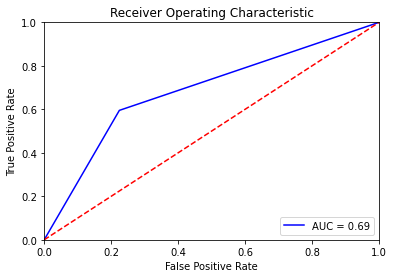

In [40]:
#Quality Check

#create ROC Curve
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [41]:
roc = metrics.roc_auc_score(y_test,y_pred)*100
print('Area Under the curve accuracy score is: {0}%'.format(roc))

Area Under the curve accuracy score is: 68.5374149659864%
